In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('boston.csv')

In [5]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.zn.replace(0,np.nan,inplace = True)
df.chas.replace(0,np.nan,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          134 non-null    float64
 3   indus       506 non-null    float64
 4   chas        35 non-null     float64
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [10]:
df.isnull().sum()

Unnamed: 0      0
crim            0
zn            372
indus           0
chas          471
nox             0
rm              0
age             0
dis             0
rad             0
tax             0
ptratio         0
black           0
lstat           0
medv            0
dtype: int64

In [16]:
df=df.drop(['zn','chas'],axis='columns')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   indus       506 non-null    float64
 3   nox         506 non-null    float64
 4   rm          506 non-null    float64
 5   age         506 non-null    float64
 6   dis         506 non-null    float64
 7   rad         506 non-null    int64  
 8   tax         506 non-null    int64  
 9   ptratio     506 non-null    float64
 10  black       506 non-null    float64
 11  lstat       506 non-null    float64
 12  medv        506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


C:\Users\karti\AppData\Local\Temp\ipykernel_6216\538125548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'])


<Axes: xlabel='medv', ylabel='Density'>

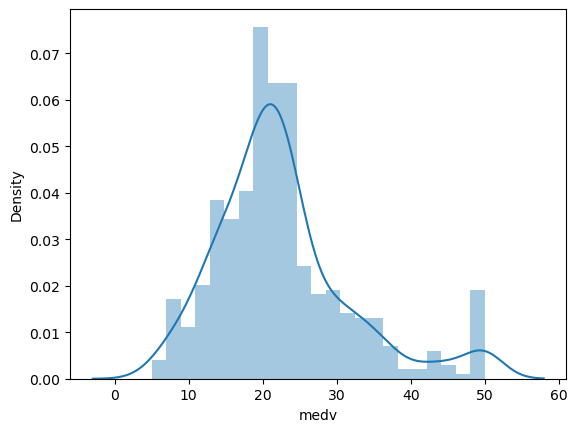

In [33]:
sns.distplot(df['medv'])

In [27]:
correlation_matrix = df.corr().round(2)

<Axes: >

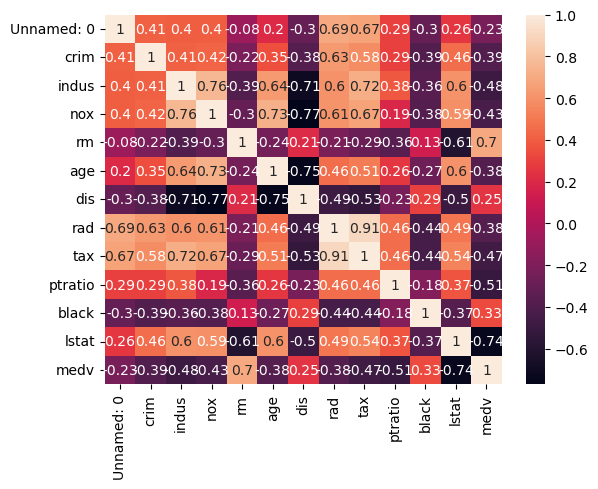

In [28]:
sns.heatmap(correlation_matrix,annot=True)

In [29]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:

y_pred = model.predict(X_test)
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test)) 

MAE 3.7177664518762823
MSE 28.53870369638856
RMSE 5.342162829452932
Score: 0.6572565692553842
